# 준비

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.3 MB/s eta 0:00:00


<Axes: title={'center': '한글'}>

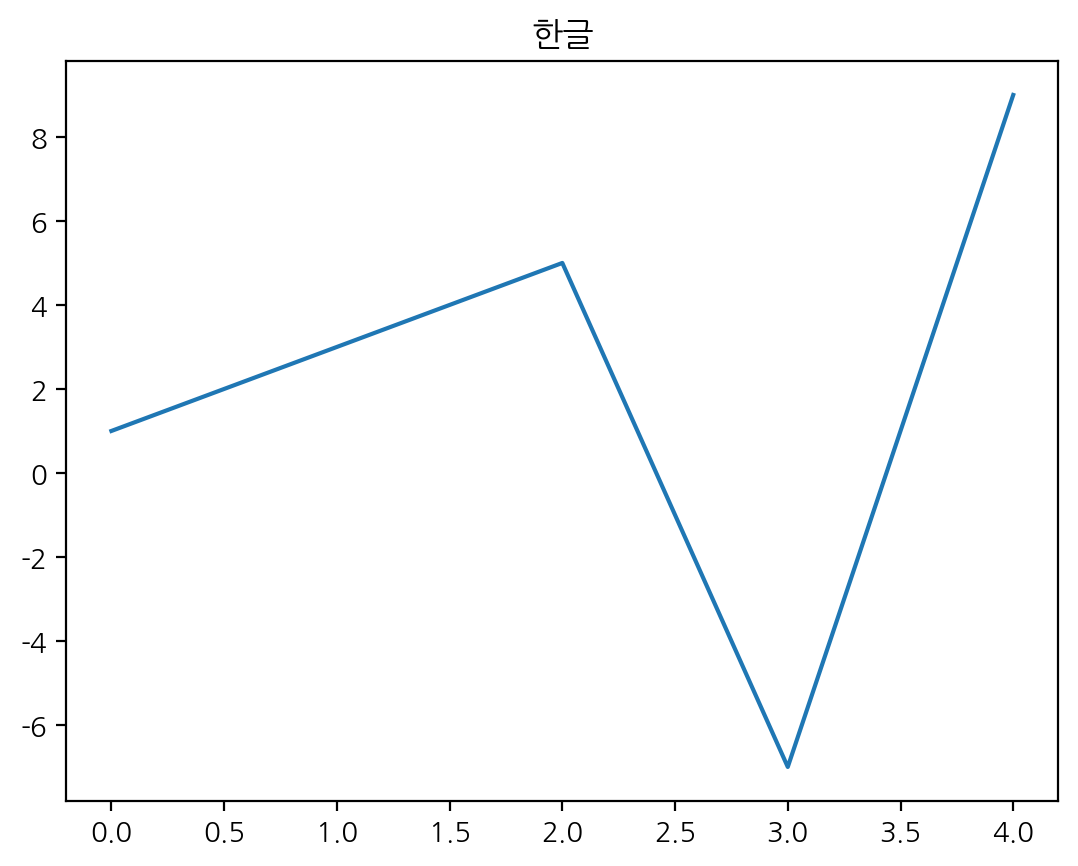

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib


import koreanize_matplotlib
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

In [ ]:
%cd /content/drive/MyDrive/최종프로젝트

/content/drive/MyDrive/최종프로젝트


# 하천중심도

In [ ]:
%cd /content/drive/MyDrive/최종프로젝트

path = './data/하천중심도.csv'

raw = pd.read_csv(path)

df = raw.copy()
df.head()

/content/drive/MyDrive/최종프로젝트


<ipython-input-2-a19003e796cd>:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(path)


,UFID,RVNU,NAME,DIVI,TYPE,STAT,SCLS,FMTA
0,100035603005E0021f2a190fadb944e6e,0.0,NaN,RCD000,RCT002,RCS000,E0022112,S2118032
1,100035702010E002125b0801cc61f477f,0.0,NaN,RCD000,RCT002,RCS000,E0022112,S2118032
2,100035702020E002113297cfe42024e99,0.0,NaN,RCD000,RCT002,RCS000,E0022112,S2118032
3,100035702009E0021ce5c981462244233,0.0,NaN,RCD000,RCT002,RCS000,E0022112,S2118032
4,100035702020E0021f91a48554d5f49f3,0.0,NaN,RCD000,RCT002,RCS000,E0022112,S2118032


In [ ]:
df.shape

(2997957, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997957 entries, 0 to 2997956
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   UFID    object 
 1   RVNU    float64
 2   NAME    object 
 3   DIVI    object 
 4   TYPE    object 
 5   STAT    object 
 6   SCLS    object 
 7   FMTA    object 
dtypes: float64(1), object(7)
memory usage: 183.0+ MB


In [ ]:
df.isnull().sum()

,0
UFID,0
RVNU,0
NAME,2765904
DIVI,0
TYPE,0
STAT,0
SCLS,0
FMTA,0


In [ ]:
df.columns

Index(['UFID', 'RVNU', 'NAME', 'DIVI', 'TYPE', 'STAT', 'SCLS', 'FMTA'], dtype='object')

In [ ]:
mapping = {
    'UFID' : 'UFID',
    'RVNU' : '하천번호',
    'NAME' : '명칭',
    'DIVI' : '구분',
    'TYPE' : '형태',
    'STAT' : '상태',
    'SCLS' : '통합코드',
    'FMTA' : '제작정보',

}

df.columns = df.columns.map(mapping)

In [ ]:
df.loc[df['구분'] == 'RCD000', '구분'] = '미분류'
df.loc[df['구분'] == 'RCD001', '구분'] = '국가하천'
df.loc[df['구분'] == 'RCD002', '구분'] = '지방하천'

df.loc[df['형태'] == 'RCT000', '형태'] = '미분류'
df.loc[df['형태'] == 'RCT001', '형태'] = '실폭'
df.loc[df['형태'] == 'RCT002', '형태'] = '세류'

df.loc[df['상태'] == 'RCS000', '상태'] = '미분류'
df.loc[df['상태'] == 'RCS001', '상태'] = '건천'
df.loc[df['상태'] == 'RCS002', '상태'] = '유천'

In [ ]:
구분_col = df['구분'].value_counts()
형태_col = df['형태'].value_counts()
상태_col = df['상태'].value_counts()

In [ ]:
print(f'구분 >> {구분_col}')
print('-'*100)
print(f'구분 >> {형태_col}')
print('-'*100)
print(f'구분 >> {상태_col}')
print('-'*100)

구분 >> 구분
미분류     2821598
지방하천     162534
국가하천      13825
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
구분 >> 형태
세류    2503354
실폭     494603
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
구분 >> 상태
미분류    2997957
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [ ]:
df.head()

,UFID,하천번호,명칭,구분,형태,상태,통합코드,제작정보
0,100035603005E0021f2a190fadb944e6e,0.0,NaN,미분류,세류,미분류,E0022112,S2118032
1,100035702010E002125b0801cc61f477f,0.0,NaN,미분류,세류,미분류,E0022112,S2118032
2,100035702020E002113297cfe42024e99,0.0,NaN,미분류,세류,미분류,E0022112,S2118032
3,100035702009E0021ce5c981462244233,0.0,NaN,미분류,세류,미분류,E0022112,S2118032
4,100035702020E0021f91a48554d5f49f3,0.0,NaN,미분류,세류,미분류,E0022112,S2118032


In [ ]:
check_df = df[df['UFID'].str.startswith('1000')]
check_df

,UFID,하천번호,명칭,구분,형태,상태,통합코드,제작정보
0,100035603005E0021f2a190fadb944e6e,0.0,NaN,미분류,세류,미분류,E0022112,S2118032
1,100035702010E002125b0801cc61f477f,0.0,NaN,미분류,세류,미분류,E0022112,S2118032
2,100035702020E002113297cfe42024e99,0.0,NaN,미분류,세류,미분류,E0022112,S2118032
3,100035702009E0021ce5c981462244233,0.0,NaN,미분류,세류,미분류,E0022112,S2118032
4,100035702020E0021f91a48554d5f49f3,0.0,NaN,미분류,세류,미분류,E0022112,S2118032
...,...,...,...,...,...,...,...,...
2997952,100037813082E0021ef08c40a64184f6e,1020700.0,제천천,지방하천,실폭,미분류,E0022115,S2116395
2997953,100037814092E002107f34388fa1c4585,0.0,NaN,미분류,실폭,미분류,E0022115,S2116395
2997954,100037814041E002174ece70e7cc34acf,1020730.0,장평천,지방하천,실폭,미분류,E0022115,S2116395
2997955,100037813096E0021b6d2c396aaca4f01,1000010.0,한강(남한강),국가하천,실폭,미분류,E0022115,S2116395


In [ ]:
df[df['명칭'] == '한강']

,UFID,하천번호,명칭,구분,형태,상태,통합코드,제작정보
2503765,100037715030E00213ab12f3f3a384227,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2112733
2503769,100037716032E002147d3860ac13f4e89,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2112733
2503771,100037716032E0021cd6aeba1f96e46ef,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2112733
2503777,100037716031E0021736fb957952243fe,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2112733
2503810,100037716032E0021285f9282f3fa45fe,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2115962
...,...,...,...,...,...,...,...,...
2992921,100037716099E00214d32c4b20d9e470e,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2119967
2992922,100037716099E0021535ccd570ec04eea,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2119967
2992927,100037716100E00215fc7b875b0f74875,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2119967
2997737,100037716099E0021b01080090a774b38,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2115424


In [ ]:
df[df['명칭'] == '우이천']

,UFID,하천번호,명칭,구분,형태,상태,통합코드,제작정보
2613874,100037705031E0021e92ea95d641b455a,1025220.0,우이천,지방하천,실폭,미분류,E0022115,S2111335
2613875,100037705042E00217ca69aeb6c474f05,1025220.0,우이천,지방하천,실폭,미분류,E0022115,S2111335
2613876,100037705042E0021f7d0fe6f9ebc453b,1025220.0,우이천,지방하천,실폭,미분류,E0022115,S2111335
2613877,100037705042E0021a8fe1ef2b4934f20,1025220.0,우이천,지방하천,실폭,미분류,E0022115,S2111335
2613878,100037705042E002137c0d18e2a674a9c,1025220.0,우이천,지방하천,실폭,미분류,E0022115,S2111335
2613879,100037705042E002180c84159828644f5,1025220.0,우이천,지방하천,실폭,미분류,E0022115,S2111335
2613880,100037705042E002180cadb2d488a44ad,1025220.0,우이천,지방하천,실폭,미분류,E0022115,S2111335
2613881,100037705042E002185a75c007ca54ef7,1025220.0,우이천,지방하천,실폭,미분류,E0022115,S2111335
2613882,100037705042E002180daed174d174b1d,1025220.0,우이천,지방하천,실폭,미분류,E0022115,S2111335
2613883,100037705042E00217b966d06cc7a4721,1025220.0,우이천,지방하천,실폭,미분류,E0022115,S2111335


# 하천면적 구하기

In [ ]:
# 서울시 하천 리스트
seoul_streams = [
    "한강",
    "청계천",
    "중랑천",
    "우이천",
    "도봉천",
    "묵동천",
    "화랑천",
    "면목천",
    "화계천",
    "당현천",
    "탄천",
    "양재천",
    "세곡천",
    "안양천",
    "목감천",
    "도림천",
    "시흥천",
    "오류천",
    "홍제천",
    "불광천",
    "녹번천",
    "성산천",
    "성내천",
    "장지천",
    "마천천",
    "고덕천",
    "망월천",
    "감이천",
    "우면천",
    "성촌천",
    "여의천",
    "새원천",
    "원지천",
    "신원천",
    "내곡천",
    "창곡천",
    "무수천",
    "백운천",
    "방학천",
    "대동천",
    "가오천",
    "마전내",
    "공대천",
    "긴고랑천",
    "백운동천",
    "청풍계",
    "옥류동천",
    "누각동천",
    "사직동천",
    "경복궁내수",
    "경희궁내수",
    "삼청동천",
    "대은암천",
    "창동천",
    "정릉동천",
    "회현동천",
    "남산동천",
    "이전동천",
    "주자동천",
    "필동천",
    "생민동천",
    "옥류천",
    "회동천",
    "제생동천",
    "금위영천",
    "북영천",
    "안국동천",
    "묵사동천",
    "쌍이문동천",
    "흥덕동천",
    "남소문동천",
    "영미정동천",
    "신당천",
    "성북천",
    "정릉천",
    "월곡천",
    "마장천",
    "성수천",
    "전농천",
    "행당천",
    "회기천",
    "반포천",
    "사당천",
    "현충천",
    "난지천",
    "세교천",
    "만초천",
    "아현천",
    "봉원천",
    "선통물천",
    "봉천천",
    "난곡천",
    "지향천",
    "항동천",
    "창릉천",
    "북한천",
    "진관천",
    "못자리골천",
    "구파발천",
    "물푸레골천",
    "동부간선수로",
    "아라천",
    "굴포천",
    "여월천",
    "고리울천",
    "오쇠천"
]

In [ ]:
filtered_df = df[df['명칭'].isin(seoul_streams)]

In [ ]:
filtered_df

,UFID,하천번호,명칭,구분,형태,상태,통합코드,제작정보
1506855,100034603029E0021700fb77caad04aa0,0.0,신원천,미분류,세류,미분류,E0022112,S2117122
2503375,100035707065E0021a4f3d3a245894e4d,4021030.0,백운천,지방하천,실폭,미분류,E0022115,S2117247
2503380,100035801076E00211baeb0cf59754d8c,0.0,백운천,미분류,실폭,미분류,E0022115,S2117247
2503566,100035715058E0021682e74fee9734a73,0.0,항동천,미분류,실폭,미분류,E0022115,S2114990
2503621,100035905032E0021cb8889ed71464ee3,2023280.0,신원천,지방하천,실폭,미분류,E0022115,S2118219
...,...,...,...,...,...,...,...,...
2996548,100036802066E0021f4267c67dd474de7,0.0,무수천,미분류,실폭,미분류,E0022115,S2112725
2996550,100036802067E00213f490c3042e94fb4,0.0,무수천,미분류,실폭,미분류,E0022115,S2112725
2997737,100037716099E0021b01080090a774b38,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2115424
2997741,100037716031E0021f2a0614049854c16,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2115424


In [ ]:
len(df['명칭'].unique())

6063

In [ ]:
filtered_df.loc[filtered_df['구분'] == '국가하천']['명칭'].unique()

array(['한강', '안양천'], dtype=object)

In [ ]:
filtered_df.loc[filtered_df['구분'] == '지방하천']['명칭'].unique()

array(['백운천', '신원천', '성산천', '장지천', '목감천', '도림천', '반포천', '탄천', '청계천',
       '양재천', '성내천', '세곡천', '여의천', '아라천', '굴포천', '창릉천', '북한천', '정릉천',
       '홍제천', '불광천', '중랑천', '마장천', '감이천', '묵동천', '우이천', '당현천', '방학천',
       '도봉천', '망월천', '고덕천', '대동천', '전농천', '월곡천', '화계천', '내곡천', '신당천',
       '마천천', '원지천', '성수천', '백운동천', '성북천', '안양천', '난곡천'], dtype=object)

In [ ]:
path = './data/하천경계.csv'

경계_raw = pd.read_csv(path)

경계_df = 경계_raw.copy()
경계_df.head()

,UFID,SCLS,FMTA
0,100036805003E0011c421f3a1dbaa4d76,E0010001,S2114816
1,100036805012E0011bddee3955fa5495b,E0010001,S2114816
2,100036805012E001104a6f10373df40a6,E0010001,S2118045
3,100036809091E00115261d62d45ad4146,E0010001,S2118045
4,100037814013E00112758c8948a1c4d01,E0010001,S2118045


In [ ]:
mapping = {
    'UFID' : 'UFID',
    'SCLS' : '통합코드',
    'FMTA' : '제작정보'

}

경계_df.columns = 경계_df.columns.map(mapping)

In [ ]:
merged_df = pd.merge(filtered_df, 경계_df, on='제작정보', how='inner')

In [ ]:
merged_df

,UFID_x,하천번호,명칭,구분,형태,상태,통합코드_x,제작정보,UFID_y,통합코드_y
0,100035707065E0021a4f3d3a245894e4d,4021030.0,백운천,지방하천,실폭,미분류,E0022115,S2117247,100035804016E001179d9922f8d8d4012,E0010001
1,100035707065E0021a4f3d3a245894e4d,4021030.0,백운천,지방하천,실폭,미분류,E0022115,S2117247,100035804015E00110bb6e21fc0b7497f,E0010001
2,100035707065E0021a4f3d3a245894e4d,4021030.0,백운천,지방하천,실폭,미분류,E0022115,S2117247,100035804015E0011b9bddbbde74f4f38,E0010001
3,100035707065E0021a4f3d3a245894e4d,4021030.0,백운천,지방하천,실폭,미분류,E0022115,S2117247,100035804015E001164045dd9c5fa4821,E0010001
4,100035707065E0021a4f3d3a245894e4d,4021030.0,백운천,지방하천,실폭,미분류,E0022115,S2117247,100035804025E0011efcbf61346904036,E0010001
...,...,...,...,...,...,...,...,...,...,...
29798,100037716100E00215fc7b875b0f74875,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2119967,100035715043E0011bd5d028a9c6a454a,E0010001
29799,100037716100E00215fc7b875b0f74875,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2119967,100035715045E0011e0370383762e4efc,E0010001
29800,100037716100E00215fc7b875b0f74875,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2119967,100035715052E00112276f0e7428c4927,E0010001
29801,100037716100E00215fc7b875b0f74875,1000010.0,한강,국가하천,실폭,미분류,E0022115,S2119967,100035715042E00117bf2d2e4816d49ec,E0010001


In [ ]:
list(merged_df['UFID_y'])

['100035804016E001179d9922f8d8d4012',
 '100035804015E00110bb6e21fc0b7497f',
 '100035804015E0011b9bddbbde74f4f38',
 '100035804015E001164045dd9c5fa4821',
 '100035804025E0011efcbf61346904036',
 '100035804020E0011ffd0b4b2e13546b6',
 '100035804025E0011a935ecd834b749dd',
 '100035804025E0011903c0d7de1f24b60',
 '100035804027E00116770be2d743240b1',
 '100036913081E001195e30eaf175e4c8a',
 '100035804010E00115b88c83600794f4f',
 '100035804029E0011c4cc783028764c06',
 '100035610079E0011c095a10c07fe4b5e',
 '100035804026E0011935381afacdf4238',
 '100035804026E00112bdc7349a553455d',
 '100035804016E001179d9922f8d8d4012',
 '100035804015E00110bb6e21fc0b7497f',
 '100035804015E0011b9bddbbde74f4f38',
 '100035804015E001164045dd9c5fa4821',
 '100035804025E0011efcbf61346904036',
 '100035804020E0011ffd0b4b2e13546b6',
 '100035804025E0011a935ecd834b749dd',
 '100035804025E0011903c0d7de1f24b60',
 '100035804027E00116770be2d743240b1',
 '100036913081E001195e30eaf175e4c8a',
 '100035804010E00115b88c83600794f4f',
 '1000358040

In [ ]:
# 'UFID' 값을 리스트로 변환
ufid_list = merged_df['UFID_y'].tolist()

# 리스트의 길이 확인
print(f"총 UFID 개수: {len(ufid_list)}")


총 UFID 개수: 29803


In [ ]:
!pip install geopandas fiona

In [ ]:
import geopandas as gpd

# 행정동 데이터와 하천경계 데이터를 읽어옴
dong_gdf = gpd.read_file('./data/2023_행정동_경계.gpkg')
river_gdf = gpd.read_file('./data/하천경계/N3A_E0010001.shp')

# 좌표계를 평면 좌표계(EPSG:3857)로 변환하여 면적 계산이 가능하도록 함
dong_gdf = dong_gdf.to_crs(epsg=3857)
river_gdf = river_gdf.to_crs(epsg=3857)

# 하천 면적 계산 (m^2 단위)
river_gdf['area_sqm'] = river_gdf.geometry.area

# 하천 면적을 km^2로 변환
river_gdf['area_sqkm'] = river_gdf['area_sqm'] / 1e6

# 행정동 ID와 하천 면적을 교차영역을 사용하여 맵핑
intersection_gdf = gpd.overlay(dong_gdf, river_gdf, how='intersection')

# 각 교차영역의 면적 계산 (m^2 단위)
intersection_gdf['intersection_area_sqm'] = intersection_gdf.geometry.area

# 교차영역의 면적을 km^2로 변환
intersection_gdf['intersection_area_sqkm'] = intersection_gdf['intersection_area_sqm'] / 1e6

# 행정동 단위별 하천 총 면적 계산
dong_river_area = intersection_gdf.groupby('adm_nm')['intersection_area_sqkm'].sum().reset_index()
dong_river_area.columns = ['adm_nm', 'river_area_sqkm']

# 행정동 전체 면적 계산 (m^2 단위)
dong_gdf['area_sqm'] = dong_gdf.geometry.area

# 행정동 전체 면적을 km^2로 변환
dong_gdf['area_sqkm'] = dong_gdf['area_sqm'] / 1e6

# 행정동 데이터와 하천 면적 데이터를 병합
dong_gdf = dong_gdf.merge(dong_river_area, on='adm_nm', how='left')

# NaN 값을 0으로 대체 (하천이 없는 행정동의 경우)
dong_gdf['river_area_sqkm'].fillna(0, inplace=True)

# 행정동 별 하천 면적 비율 계산
dong_gdf['river_area_ratio'] = dong_gdf['river_area_sqkm'] / dong_gdf['area_sqkm']

# 결과 출력
print(dong_gdf[['adm_nm', 'river_area_sqkm', 'area_sqkm', 'river_area_ratio']])


             adm_nm  river_area_sqkm  area_sqkm  river_area_ratio
0     서울특별시 종로구 사직동         0.000000   1.859083          0.000000
1     서울특별시 종로구 삼청동         0.000000   2.171915          0.000000
2     서울특별시 종로구 부암동         0.023106   3.513782          0.006576
3     서울특별시 종로구 평창동         0.050816  14.395302          0.003530
4     서울특별시 종로구 무악동         0.000000   0.745724          0.000000
..              ...              ...        ...               ...
421  서울특별시 강동구 암사1동         0.000000   1.163787          0.000000
422  서울특별시 강동구 천호2동         0.735509   2.913768          0.252425
423    서울특별시 강동구 길동         0.000000   2.550985          0.000000
424  서울특별시 구로구 오류2동         0.050677   4.901979          0.010338
425   서울특별시 강동구 강일동         0.391286   4.094868          0.095555

[426 rows x 4 columns]


In [ ]:
dong_gdf['adm_nm'].unique()

array(['서울특별시 종로구 사직동', '서울특별시 종로구 삼청동', '서울특별시 종로구 부암동', '서울특별시 종로구 평창동',
       '서울특별시 종로구 무악동', '서울특별시 종로구 교남동', '서울특별시 종로구 가회동',
       '서울특별시 종로구 종로1·2·3·4가동', '서울특별시 종로구 종로5·6가동', '서울특별시 종로구 이화동',
       '서울특별시 종로구 창신1동', '서울특별시 종로구 창신2동', '서울특별시 종로구 창신3동',
       '서울특별시 종로구 숭인1동', '서울특별시 종로구 숭인2동', '서울특별시 종로구 청운효자동',
       '서울특별시 종로구 혜화동', '서울특별시 중구 소공동', '서울특별시 중구 회현동', '서울특별시 중구 명동',
       '서울특별시 중구 필동', '서울특별시 중구 장충동', '서울특별시 중구 광희동', '서울특별시 중구 을지로동',
       '서울특별시 중구 신당5동', '서울특별시 중구 황학동', '서울특별시 중구 중림동', '서울특별시 중구 신당동',
       '서울특별시 중구 다산동', '서울특별시 중구 약수동', '서울특별시 중구 청구동', '서울특별시 중구 동화동',
       '서울특별시 용산구 후암동', '서울특별시 용산구 용산2가동', '서울특별시 용산구 남영동',
       '서울특별시 용산구 원효로2동', '서울특별시 용산구 효창동', '서울특별시 용산구 용문동',
       '서울특별시 용산구 이촌1동', '서울특별시 용산구 이촌2동', '서울특별시 용산구 이태원1동',
       '서울특별시 용산구 이태원2동', '서울특별시 용산구 서빙고동', '서울특별시 용산구 보광동',
       '서울특별시 용산구 청파동', '서울특별시 용산구 원효로1동', '서울특별시 용산구 한강로동',
       '서울특별시 용산구 한남동', '서울특별시 성동구 왕십리2동', '서울특별시 성동구 마장동',
       '서울특별시 성동구 사근동', '

In [ ]:
import geopandas as gpd

# 행정동 데이터와 하천경계 데이터를 읽어옴
dong_gdf = gpd.read_file('./data/2023_행정동_경계.gpkg')
river_gdf = gpd.read_file('./data/하천경계/N3A_E0010001.shp')

# 좌표계를 평면 좌표계(EPSG:3857)로 변환하여 면적 계산이 가능하도록 함
dong_gdf = dong_gdf.to_crs(epsg=3857)
river_gdf = river_gdf.to_crs(epsg=3857)

# 하천 면적 계산 (m^2 단위)
river_gdf['area_sqm'] = river_gdf.geometry.area

# 하천 면적을 km^2로 변환
river_gdf['area_sqkm'] = river_gdf['area_sqm'] / 1e6

# 행정동과 하천의 교차영역을 계산
intersection_gdf = gpd.overlay(dong_gdf, river_gdf, how='intersection')

# 각 교차영역의 면적 계산 (m^2 단위)
intersection_gdf['intersection_area_sqm'] = intersection_gdf.geometry.area

# 교차영역의 면적을 km^2로 변환
intersection_gdf['intersection_area_sqkm'] = intersection_gdf['intersection_area_sqm'] / 1e6

# 행정동 단위별 하천 면적 계산
dong_river_area = intersection_gdf.groupby('adm_nm')['intersection_area_sqkm'].sum().reset_index()
dong_river_area.columns = ['adm_nm', 'river_area_sqkm']

# 행정동 전체 면적 계산 (m^2 단위)
dong_gdf['area_sqm'] = dong_gdf.geometry.area

# 행정동 전체 면적을 km^2로 변환
dong_gdf['area_sqkm'] = dong_gdf['area_sqm'] / 1e6

# 행정동 데이터와 하천 면적 데이터를 병합
dong_gdf = dong_gdf.merge(dong_river_area, on='adm_nm', how='left')

# NaN 값을 0으로 대체 (하천이 없는 행정동의 경우)
dong_gdf['river_area_sqkm'].fillna(0, inplace=True)

# 행정동 별 하천 면적 비율 계산
dong_gdf['river_area_ratio'] = dong_gdf['river_area_sqkm'] / dong_gdf['area_sqkm']

# 결과 출력
print(dong_gdf[['adm_nm', 'river_area_sqkm', 'area_sqkm', 'river_area_ratio']])


             adm_nm  river_area_sqkm  area_sqkm  river_area_ratio
0     서울특별시 종로구 사직동         0.000000   1.859083          0.000000
1     서울특별시 종로구 삼청동         0.000000   2.171915          0.000000
2     서울특별시 종로구 부암동         0.023106   3.513782          0.006576
3     서울특별시 종로구 평창동         0.050816  14.395302          0.003530
4     서울특별시 종로구 무악동         0.000000   0.745724          0.000000
..              ...              ...        ...               ...
421  서울특별시 강동구 암사1동         0.000000   1.163787          0.000000
422  서울특별시 강동구 천호2동         0.735509   2.913768          0.252425
423    서울특별시 강동구 길동         0.000000   2.550985          0.000000
424  서울특별시 구로구 오류2동         0.050677   4.901979          0.010338
425   서울특별시 강동구 강일동         0.391286   4.094868          0.095555

[426 rows x 4 columns]


In [ ]:
dong_gdf.columns

Index(['adm_nm', 'adm_cd', 'adm_cd2', 'sgg', 'sido', 'sidonm', 'temp', 'sggnm',
       'adm_cd8', 'geometry', 'area_sqm', 'area_sqkm', 'river_area_sqkm',
       'river_area_ratio'],
      dtype='object')

In [ ]:
dong_gdf

,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,temp,sggnm,adm_cd8,geometry,area_sqm,area_sqkm,river_area_sqkm,river_area_ratio
0,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구 사직동,종로구,11010530,"MULTIPOLYGON (((14135002.608 4519651.727, 1413...",1.859083e+06,1.859083,0.000000,0.000000
1,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구 삼청동,종로구,11010540,"MULTIPOLYGON (((14135648.322 4522379.030, 1413...",2.171915e+06,2.171915,0.000000,0.000000
2,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구 부암동,종로구,11010550,"MULTIPOLYGON (((14134887.092 4522589.591, 1413...",3.513782e+06,3.513782,0.023106,0.006576
3,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구 평창동,종로구,11010560,"MULTIPOLYGON (((14134800.655 4527483.134, 1413...",1.439530e+07,14.395302,0.050816,0.003530
4,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구 무악동,종로구,11010570,"MULTIPOLYGON (((14133197.528 4520374.696, 1413...",7.457244e+05,0.745724,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,서울특별시 강동구 암사1동,1125072,1174057000,11740,11,서울특별시,강동구 암사1동,강동구,11250720,"MULTIPOLYGON (((14153657.856 4516719.353, 1415...",1.163787e+06,1.163787,0.000000,0.000000
422,서울특별시 강동구 천호2동,1125073,1174061000,11740,11,서울특별시,강동구 천호2동,강동구,11250730,"MULTIPOLYGON (((14152556.467 4515645.197, 1415...",2.913768e+06,2.913768,0.735509,0.252425
423,서울특별시 강동구 길동,1125074,1174068500,11740,11,서울특별시,강동구 길동,강동구,11250740,"MULTIPOLYGON (((14154113.906 4515456.894, 1415...",2.550985e+06,2.550985,0.000000,0.000000
424,서울특별시 구로구 오류2동,1117073,1153078000,11530,11,서울특별시,구로구 오류2동,구로구,11170730,"MULTIPOLYGON (((14118850.690 4505885.237, 1411...",4.901979e+06,4.901979,0.050677,0.010338


In [ ]:
하천면적_df = dong_gdf[['adm_nm','sggnm','area_sqkm', 'river_area_sqkm',
       'river_area_ratio']]

In [ ]:
mapping = {
    'adm_nm' : '행정동',
    'sggnm' : '구단위',
    'river_area_sqkm' : '행정동_하천면적(km)',
    'area_sqkm' : '행정동_총_면적(km)',
    'river_area_ratio' : '하천면적비율'

}

하천면적_df.columns = 하천면적_df.columns.map(mapping)

In [ ]:
하천면적_df

,행정동,구단위,행정동_총_면적(km),행정동_하천면적(km),하천면적비율
0,서울특별시 종로구 사직동,종로구,1.859083,0.000000,0.000000
1,서울특별시 종로구 삼청동,종로구,2.171915,0.000000,0.000000
2,서울특별시 종로구 부암동,종로구,3.513782,0.023106,0.006576
3,서울특별시 종로구 평창동,종로구,14.395302,0.050816,0.003530
4,서울특별시 종로구 무악동,종로구,0.745724,0.000000,0.000000
...,...,...,...,...,...
421,서울특별시 강동구 암사1동,강동구,1.163787,0.000000,0.000000
422,서울특별시 강동구 천호2동,강동구,2.913768,0.735509,0.252425
423,서울특별시 강동구 길동,강동구,2.550985,0.000000,0.000000
424,서울특별시 구로구 오류2동,구로구,4.901979,0.050677,0.010338


In [ ]:
하천면적_df.shape

(426, 5)

In [ ]:
하천면적_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   행정동           426 non-null    object 
 1   구단위           426 non-null    object 
 2   행정동_총_면적(km)  426 non-null    float64
 3   행정동_하천면적(km)  426 non-null    float64
 4   하천면적비율        426 non-null    float64
dtypes: float64(3), object(2)
memory usage: 16.8+ KB


In [ ]:
하천면적_df.describe()

,행정동_총_면적(km),행정동_하천면적(km),하천면적비율
count,426.000000,426.000000,426.000000
mean,2.272547,0.143687,0.048871
std,2.536595,0.408698,0.104736
min,0.351510,0.000000,0.000000
25%,1.066993,0.000000,0.000000
50%,1.586932,0.004831,0.002486
75%,2.401292,0.064072,0.030231
max,20.886409,4.527430,0.603487


In [ ]:
하천면적_df[하천면적_df['행정동'] == '서울특별시 강동구 암사2동']

,행정동,구단위,행정동_총_면적(km),행정동_하천면적(km),하천면적비율
412,서울특별시 강동구 암사2동,강동구,3.893545,2.199058,0.564796


In [ ]:
하천면적_df[하천면적_df['행정동'] == '서울특별시 강남구 대치2동']

,행정동,구단위,행정동_총_면적(km),행정동_하천면적(km),하천면적비율
377,서울특별시 강남구 대치2동,강남구,3.279797,0.291703,0.088939


In [ ]:
하천면적_df[하천면적_df['행정동'] == '서울특별시 송파구 잠실2동']

,행정동,구단위,행정동_총_면적(km),행정동_하천면적(km),하천면적비율
402,서울특별시 송파구 잠실2동,송파구,4.581545,1.888817,0.412266


In [ ]:
하천면적_df[하천면적_df['행정동'] == '서울특별시 강남구 역삼1동']

,행정동,구단위,행정동_총_면적(km),행정동_하천면적(km),하천면적비율
364,서울특별시 강남구 역삼1동,강남구,3.767109,0.0,0.0


In [ ]:
하천면적_df[하천면적_df['행정동'] == '서울특별시 송파구 송파2동']

,행정동,구단위,행정동_총_면적(km),행정동_하천면적(km),하천면적비율
390,서울특별시 송파구 송파2동,송파구,0.953863,0.0,0.0


In [ ]:
하천면적_df[하천면적_df['행정동'] == '서울특별시 강동구 성내3동']

,행정동,구단위,행정동_총_면적(km),행정동_하천면적(km),하천면적비율
418,서울특별시 강동구 성내3동,강동구,1.022676,0.0,0.0


In [ ]:
# 하천면적_df.to_csv('./data/하천면적.csv', index=False)

# 하천과의 거리

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

# 데이터 로드
dong_gdf = gpd.read_file("./data/2023_행정동_경계.gpkg")  # 행정동 경계 데이터
river_gdf = gpd.read_file("./data/서울_하천중심도.gpkg")       # 하천 위치 데이터

KeyboardInterrupt: 

In [ ]:
dong_gdf

In [ ]:
river_gdf

In [ ]:
import geopandas as gpd
from shapely.ops import nearest_points

# 좌표계를 EPSG:3857로 변환
river_gdf = river_gdf.to_crs(epsg=3857)
dong_gdf = dong_gdf.to_crs(epsg=3857)

# 각 행정동의 중심점 계산
dong_gdf['centroid'] = dong_gdf.geometry.centroid

# 각 중심점에서 가장 가까운 하천까지의 거리 계산
def nearest_river_distance(row):
    # 현재 중심점과 가장 가까운 하천 포인트를 찾음
    nearest = nearest_points(row['centroid'], river_gdf.unary_union)[1]
    # 거리 계산
    return row['centroid'].distance(nearest)

# 거리 계산 결과를 새로운 컬럼에 저장
dong_gdf['distance_to_river'] = dong_gdf.apply(nearest_river_distance, axis=1)

# 거리 단위를 킬로미터로 변환
dong_gdf['distance_to_river_km'] = dong_gdf['distance_to_river'] / 1000

print(dong_gdf[['adm_nm', 'distance_to_river_km']])

In [ ]:
dong_gdf.columns

In [ ]:
하천거리_df = dong_gdf[['adm_nm','sggnm','distance_to_river']]

In [ ]:
mapping = {
    'adm_nm' : '행정동',
    'sggnm' : '구단위',
    'distance_to_river' : '하천_거리'
}

하천거리_df.columns = 하천거리_df.columns.map(mapping)

In [ ]:
하천거리_df

In [ ]:
# 하천거리_df.to_csv('./data/하천거리.csv', index=False)

# 빗물펌프장 거리

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# 1. Shapefile 읽기
admin_boundaries = gpd.read_file('./data/행정구역.gpkg', encoding='cp949')
pump_stations = gpd.read_file('./data/펌프펌프펌프.gpkg', encoding='cp949')

# 2. 행정동 경계의 중심점 계산
admin_boundaries['centroid'] = admin_boundaries.geometry.centroid

# 3. 각 중심점에서 가장 가까운 빗물펌프장 찾기
def find_nearest_pump_station(centroid, pump_stations):
    distances = pump_stations.geometry.distance(centroid)
    min_distance_index = distances.idxmin()
    nearest_pump_station = pump_stations.loc[min_distance_index, 'geometry']
    return nearest_pump_station, distances[min_distance_index]

nearest_pump_stations = []
distances_to_pump_stations = []

for centroid in admin_boundaries['centroid']:
    nearest_pump_station, distance = find_nearest_pump_station(centroid, pump_stations)
    nearest_pump_stations.append(nearest_pump_station)
    distances_to_pump_stations.append(distance)

admin_boundaries['nearest_pump_station'] = nearest_pump_stations
admin_boundaries['distance_to_pump_station'] = distances_to_pump_stations

# 4. 거리를 읽기 쉬운 형식으로 변환 (예: 미터를 킬로미터로)
admin_boundaries['distance_to_pump_station_km'] = admin_boundaries['distance_to_pump_station'] / 1000

In [ ]:
pump_stations

,OBJECTID,RV_CD,SP_CD,UNI_CD,IDX_NO,PUMP_NM,ETC,OPR_YN,EST_DT,geometry
0,6825,1005090,C02,1005090C020000000046,0000000046,���̹�2,812,None,None,MULTIPOINT (206013.48000 555296.13000)
1,6826,1000010,C02,1000010C020000001001,0000001001,����,903,None,None,MULTIPOINT (201576.62000 549085.59000)
2,6827,1000010,C02,1000010C020000001002,0000001002,����,1202,None,None,MULTIPOINT (208184.08000 548025.41000)
3,6828,1005090,C02,1005090C020000001003,0000001003,����,904,None,None,MULTIPOINT (202961.10000 549962.40000)
4,6829,1005090,C02,1005090C020000001004,0000001004,�Ҽ�,901,None,None,MULTIPOINT (203709.31000 550156.38000)
...,...,...,...,...,...,...,...,...,...,...
113,7146,1025210,C02,1025210C020000000039,0000000039,����2,402,None,None,MULTIPOINT (206277.78000 558201.22000)
114,7147,1000010,C02,1000010C020000000023,0000000023,�ɿ�,1604,None,None,MULTIPOINT (195529.04000 548270.81000)
115,7148,1000010,C02,1000010C020000000024,0000000024,��ȿ,1602,None,None,MULTIPOINT (196418.29000 548269.48000)
116,7149,1000010,C02,1000010C020000000025,0000000025,����,1601,None,None,MULTIPOINT (196328.95000 548050.18000)


In [ ]:
gpd.read_file('./data/행정구역.gpkg', encoding='cp949')

,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,temp,sggnm,adm_cd8,geometry
0,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구 사직동,종로구,11010530,"MULTIPOLYGON (((197958.449 552900.684, 197971...."
1,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구 삼청동,종로구,11010540,"MULTIPOLYGON (((198471.244 555055.390, 198531...."
2,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구 부암동,종로구,11010550,"MULTIPOLYGON (((197867.379 555221.862, 197667...."
3,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구 평창동,종로구,11010560,"MULTIPOLYGON (((197799.834 559086.753, 197924...."
4,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구 무악동,종로구,11010570,"MULTIPOLYGON (((196526.290 553472.425, 196714...."
...,...,...,...,...,...,...,...,...,...,...
421,서울특별시 강동구 암사1동,1125072,1174057000,11740,11,서울특별시,강동구 암사1동,강동구,11250720,"MULTIPOLYGON (((212765.648 550592.784, 212652...."
422,서울특별시 강동구 천호2동,1125073,1174061000,11740,11,서울특별시,강동구 천호2동,강동구,11250730,"MULTIPOLYGON (((211892.626 549742.417, 211590...."
423,서울특별시 강동구 길동,1125074,1174068500,11740,11,서울특별시,강동구 길동,강동구,11250740,"MULTIPOLYGON (((213129.219 549595.426, 213141...."
424,서울특별시 구로구 오류2동,1117073,1153078000,11530,11,서울특별시,구로구 오류2동,구로구,11170730,"MULTIPOLYGON (((185121.830 542028.483, 185171...."


In [ ]:
admin_boundaries

,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,temp,sggnm,adm_cd8,geometry,centroid,nearest_pump_station,distance_to_pump_station,distance_to_pump_station_km
0,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구 사직동,종로구,11010530,"MULTIPOLYGON (((197958.449 552900.684, 197971....",POINT (197362.562 552729.621),MULTIPOINT (197555.59 548678.6099999989),4055.607378,4.055607
1,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구 삼청동,종로구,11010540,"MULTIPOLYGON (((198471.244 555055.390, 198531....",POINT (198331.945 554272.676),MULTIPOINT (202430.79 552775.98),4363.557106,4.363557
2,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구 부암동,종로구,11010550,"MULTIPOLYGON (((197867.379 555221.862, 197667....",POINT (196693.345 555237.149),MULTIPOINT (192229.1 551824.710000001),5619.094582,5.619095
3,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구 평창동,종로구,11010560,"MULTIPOLYGON (((197799.834 559086.753, 197924....",POINT (197287.223 557153.268),MULTIPOINT (202479.25 557719.539999999),5222.816610,5.222817
4,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구 무악동,종로구,11010570,"MULTIPOLYGON (((196526.290 553472.425, 196714....",POINT (196377.356 553133.185),MULTIPOINT (192229.1 551824.710000001),4349.727775,4.349728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,서울특별시 강동구 암사1동,1125072,1174057000,11740,11,서울특별시,강동구 암사1동,강동구,11250720,"MULTIPOLYGON (((212765.648 550592.784, 212652....",POINT (211892.565 550267.907),MULTIPOINT (210764.24 549525.369999999),1350.733138,1.350733
422,서울특별시 강동구 천호2동,1125073,1174061000,11740,11,서울특별시,강동구 천호2동,강동구,11250730,"MULTIPOLYGON (((211892.626 549742.417, 211590....",POINT (210805.787 549471.297),MULTIPOINT (210764.24 549525.369999999),68.191260,0.068191
423,서울특별시 강동구 길동,1125074,1174068500,11740,11,서울특별시,강동구 길동,강동구,11250740,"MULTIPOLYGON (((213129.219 549595.426, 213141....",POINT (212895.019 548923.115),MULTIPOINT (210764.24 549525.369999999),2214.255829,2.214256
424,서울특별시 구로구 오류2동,1117073,1153078000,11530,11,서울특별시,구로구 오류2동,구로구,11170730,"MULTIPOLYGON (((185121.830 542028.483, 185171....",POINT (185705.191 542880.990),MULTIPOINT (188255.16 543936.3200000001),2759.721782,2.759722


In [ ]:
admin_boundaries.columns

Index(['adm_nm', 'adm_cd', 'adm_cd2', 'sgg', 'sido', 'sidonm', 'temp', 'sggnm',
       'adm_cd8', 'geometry', 'centroid', 'nearest_pump_station',
       'distance_to_pump_station', 'distance_to_pump_station_km'],
      dtype='object')

In [ ]:
빗물펌프거리_df = admin_boundaries[['adm_nm', 'sggnm','distance_to_pump_station', 'distance_to_pump_station_km','nearest_pump_station']]

In [ ]:
mapping = {
    'adm_nm' : '행정동',
    'sggnm' : '구단위',
    'distance_to_pump_station' : '빗물펌프_거리',
    'distance_to_pump_station_km' : '빗물펌프_거리(km)',
    'nearest_pump_station' : 'nearest_pump_station'
}

빗물펌프거리_df.columns = 빗물펌프거리_df.columns.map(mapping)

In [ ]:
빗물펌프거리_df

,행정동,구단위,빗물펌프_거리,빗물펌프_거리(km),nearest_pump_station
0,서울특별시 종로구 사직동,종로구,4055.607378,4.055607,MULTIPOINT (197555.59 548678.6099999989)
1,서울특별시 종로구 삼청동,종로구,4363.557106,4.363557,MULTIPOINT (202430.79 552775.98)
2,서울특별시 종로구 부암동,종로구,5619.094582,5.619095,MULTIPOINT (192229.1 551824.710000001)
3,서울특별시 종로구 평창동,종로구,5222.816610,5.222817,MULTIPOINT (202479.25 557719.539999999)
4,서울특별시 종로구 무악동,종로구,4349.727775,4.349728,MULTIPOINT (192229.1 551824.710000001)
...,...,...,...,...,...
421,서울특별시 강동구 암사1동,강동구,1350.733138,1.350733,MULTIPOINT (210764.24 549525.369999999)
422,서울특별시 강동구 천호2동,강동구,68.191260,0.068191,MULTIPOINT (210764.24 549525.369999999)
423,서울특별시 강동구 길동,강동구,2214.255829,2.214256,MULTIPOINT (210764.24 549525.369999999)
424,서울특별시 구로구 오류2동,구로구,2759.721782,2.759722,MULTIPOINT (188255.16 543936.3200000001)


In [ ]:
빗물펌프거리_df.to_csv('./data/서울시_빗물펌프거리.csv', index=False)

# 고도 위치 추출

In [ ]:
import geopandas as gpd

# 행정동 경계 shp 파일과 서울 등고선 shp 파일 로드
admin_gdf = gpd.read_file("./data/행정구역.gpkg")
contour_gdf = gpd.read_file("./data/서울특별시_경사도_20220603 (1)/등고선 5000/N3L_F001.shp")

# 좌표계를 행정동 경계 파일과 동일하게 변환
contour_gdf = contour_gdf.to_crs(admin_gdf.crs)

# 중심점을 구하는 함수
contour_gdf['centroid'] = contour_gdf.centroid

# 각 중심점이 어느 행정동에 속하는지 확인하는 함수
def find_admin_dong(point, admin_gdf):
    for idx, row in admin_gdf.iterrows():
        if row['geometry'].contains(point):
            return row['adm_nm']  # 실제 행정동명이 들어있는 컬럼명으로 대체하세요.
    return None

# 중심점과 행정동을 매핑
contour_gdf['행정동'] = contour_gdf['centroid'].apply(lambda point: find_admin_dong(point, admin_gdf))

# 결과 출력
print(contour_gdf[['UFID', '행정동']])


KeyboardInterrupt: 

In [ ]:
contour_gdf[contour_gdf['행정동'] == '서울특별시 동대문구 답십리1동']['UFID']

In [ ]:
contour_gdf['행정동'].value_counts()

In [ ]:
contour_gdf

In [ ]:
import geopandas as gpd

# 행정동 경계 shp 파일과 서울 등고선 shp 파일 로드
admin_gdf = gpd.read_file("./data/행정구역.gpkg")
contour_gdf = gpd.read_file("./data/고도.gpkg")

# 좌표계를 행정동 경계 파일과 동일하게 변환
contour_gdf = contour_gdf.to_crs(admin_gdf.crs)

# 각 geometry가 어느 행정동에 속하는지 확인하는 함수
def find_admin_dong(geometry, admin_gdf):
    for idx, row in admin_gdf.iterrows():
        if row['geometry'].intersects(geometry):  # geometry가 겹치는지 확인
            return row['adm_nm']  # 실제 행정동명이 들어있는 컬럼명으로 대체하세요.
    return None

# 각 geometry와 행정동을 매핑
contour_gdf['행정동'] = contour_gdf['geometry'].apply(lambda geom: find_admin_dong(geom, admin_gdf))

# 결과 출력
print(contour_gdf[['UFID', '행정동']])


In [ ]:
contour_gdf['행정동'].value_counts()

In [ ]:
contour_gdf.columns

In [ ]:
admin_gdf

In [ ]:
admin_gdf = admin_gdf.rename(columns={'adm_nm': '행정동명'})

In [ ]:
merged_gdf = contour_gdf.merge(admin_gdf, left_on='행정동', right_on='행정동명', how='inner')

In [ ]:
merged_gdf.columns

In [ ]:
등고수치_df = merged_gdf[['행정동', 'sggnm','DIVI', 'CONT', 'SCLS', 'SHAPE_LEN','HEIGHT']]

In [ ]:
mapping = {
    '행정동' : '행정동',
    'sggnm' : '구단위',
    'DIVI' : '구분코드',
    'CONT' : '등고수치',
    'SCLS' : '통합코드',
    'SHAPE_LEN' : '둘레_측정값(m)',
    'HEIGHT' : '높이'
}

등고수치_df.columns = 등고수치_df.columns.map(mapping)

In [ ]:
등고수치_df

In [ ]:
# 등고수치_df.to_csv('./data/완성데이터/서울시_고도.csv', index=False)

# 침수흔적도와 하천경계 거리


In [ ]:
import geopandas as gpd

In [ ]:
# 1. shp 파일 읽어오기
flood_shapefiles = {
   '2018': './data/침수흔적도/2018년 서울특별시 침수흔적도/서울시_2018.shp',
   '2019':'./data/침수흔적도/2019년 서울특별시 침수흔적도/서울시_2019.shp',
   '2020': './data/침수흔적도/2020년 서울특별시 침수흔적도/서울시_2020.shp',
   '2022':'./data/침수흔적도/2022년 침수흔적도_230717수정/서울시_2022.shp'
}
river_shapefile = './data/서울_하천중심도.gpkg'

In [ ]:
침수_2018 = './data/침수흔적도/2018년 서울특별시 침수흔적도/서울시_2018.shp'

In [ ]:
gpd.read_file(침수_2018)

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,F_YR,GU_NAM,F_SHIM,geometry
0,2018년 8.26~9.1 호우,76.63,94.71,1130510100,20180826,20180901,1,5,침수(공공하수도역류),강북구 미아동258-721,2018,2018,강북구,0.45,"POLYGON ((958655.522 1958405.934, 958679.762 1..."
1,2018년 8.26~9.1 호우,76.63,74.09,1130510100,20180826,20180901,1,5,침수(기타),강북구 미아동258-720,2018,2018,강북구,0.45,"POLYGON ((958655.572 1958426.827, 958675.199 1..."
2,2020년 7.28~8.11 호우,88.92,73.08,1130510100,20200728,20200811,1,5,침수,강북구 미아동258-561,2018,2018,강북구,0.45,"POLYGON ((958837.845 1958211.423, 958837.203 1..."
3,2018년 8.26~9.1 호우,32.20,148.50,1130510300,20180826,20180901,1,5,침수(기타),강북구 수유동222-50,2018,2018,강북구,0.45,"POLYGON ((958014.142 1960108.733, 958022.133 1..."
4,2018년 8.26~9.1 호우,32.47,623.76,1130510300,20180826,20180901,1,5,침수,강북구 수유동222-13,2018,2018,강북구,0.45,"POLYGON ((957994.185 1960113.647, 958001.141 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2018년 8.26~9.1 호우,13.55,91.24,1147010300,20180826,20180901,20,24,내수침수,양천구 신월동 221-13,2018,2018,양천구,0.25,"POLYGON ((941249.101 1947940.974, 941249.896 1..."
838,2018년 8.26~9.1 호우,13.46,52.80,1147010300,20180826,20180901,20,24,내수침수,양천구 신월동 225-21,2018,2018,양천구,0.01,"POLYGON ((941210.189 1948009.646, 941220.599 1..."
839,2018년 8.26~9.1 호우,10.31,75.18,1147010300,20180826,20180901,20,24,내수침수,양천구 신월동 233-36,2018,2018,양천구,0.25,"POLYGON ((941441.725 1947954.628, 941445.520 1..."
840,2018년 8.26~9.1 호우,13.83,82.52,1147010300,20180826,20180901,20,24,내수침수,양천구 신월동 221-9,2018,2018,양천구,0.25,"POLYGON ((941216.810 1947938.686, 941217.806 1..."


In [ ]:
import geopandas as gpd

# 1. shp 파일 읽어오기
flood_shapefiles = {
   '2018': './data/침수흔적도/2018년 서울특별시 침수흔적도/서울시_2018.shp',
   '2019':'./data/침수흔적도/2019년 서울특별시 침수흔적도/서울시_2019.shp',
   '2020': './data/침수흔적도/2020년 서울특별시 침수흔적도/서울시_2020.shp',
   '2022':'./data/침수흔적도/2022년 침수흔적도_230717수정/서울시_2022.shp'
}
river_shapefile = './data/서울_하천중심도.gpkg'

# 하천경계 shp 파일 읽기
rivers = gpd.read_file(river_shapefile)

# 각 연도별 침수흔적도의 중심점과 하천경계까지의 거리 계산
results = {}

for year, flood_shapefile in flood_shapefiles.items():
    # 침수흔적도 읽기
    floods = gpd.read_file(flood_shapefile)

    # 각 폴리곤의 중심점 계산
    floods['centroid'] = floods.geometry.centroid

    # 결과를 저장할 리스트 초기화
    distances = []

    # 각 중심점에 대해 하천경계까지의 거리 계산
    for index, row in floods.iterrows():
        centroid = row['centroid']
        # 중심점과 하천경계 사이의 거리 계산
        distance = rivers.distance(centroid).min()
        distances.append(distance)

    # 결과 저장
    results[year] = distances

# 결과 출력
for year, distances in results.items():
    print(f"연도 {year}의 각 중심점과 하천경계까지의 최소 거리:")
    # for distance in distances:
    #     print(f"  거리: {distance:.2f} 단위")


KeyboardInterrupt: 

In [ ]:
import geopandas as gpd

# 1. shp 파일 읽어오기
flood_shapefiles = {
   '2018': './data/침수흔적도/2018년 서울특별시 침수흔적도/서울시_2018.shp',
   '2019':'./data/침수흔적도/2019년 서울특별시 침수흔적도/서울시_2019.shp',
   '2020': './data/침수흔적도/2020년 서울특별시 침수흔적도/서울시_2020.shp',
   '2022':'./data/침수흔적도/2022년 침수흔적도_230717수정/서울시_2022.shp'
}
river_shapefile = './data/서울_하천중심도.gpkg'

# 하천경계 shp 파일 읽기
rivers = gpd.read_file(river_shapefile)

# 결과를 저장할 딕셔너리 초기화
results = {}

# 각 연도별 침수흔적도의 중심점과 하천경계까지의 거리 계산
for year, flood_shapefile in flood_shapefiles.items():
    # 침수흔적도 읽기
    floods = gpd.read_file(flood_shapefile)

    # 각 폴리곤의 중심점 계산
    floods['centroid'] = floods.geometry.centroid

    # 거리 계산을 위해 중심점 GeoDataFrame 생성
    centroids = gpd.GeoDataFrame(geometry=floods['centroid'], crs=floods.crs)

    # 거리 계산 및 기타 컬럼을 포함한 결과 데이터프레임 초기화
    flood_data = floods.copy()
    flood_data['distance_to_river'] = centroids.apply(lambda x: rivers.distance(x.geometry).min(), axis=1)

    # 결과를 저장할 딕셔너리에 추가
    results[year] = flood_data

# 결과 출력
for year, data in results.items():
    print(f"\n연도 {year}의 침수흔적도와 하천경계까지의 거리:")
    print(data[['distance_to_river'] + [col for col in data.columns if col != 'distance_to_river']])



연도 2018의 침수흔적도와 하천경계까지의 거리:
     distance_to_river           F_DISA_NM  F_AVR_HGT  F_AREA      ADM_CD  \
0          1166.095274   2018년 8.26~9.1 호우      76.63   94.71  1130510100   
1          1154.353826   2018년 8.26~9.1 호우      76.63   74.09  1130510100   
2          1218.560154  2020년 7.28~8.11 호우      88.92   73.08  1130510100   
3           666.346533   2018년 8.26~9.1 호우      32.20  148.50  1130510300   
4           675.277147   2018년 8.26~9.1 호우      32.47  623.76  1130510300   
..                 ...                 ...        ...     ...         ...   
837        1902.430767   2018년 8.26~9.1 호우      13.55   91.24  1147010300   
838        1872.189004   2018년 8.26~9.1 호우      13.46   52.80  1147010300   
839        2094.518534   2018년 8.26~9.1 호우      10.31   75.18  1147010300   
840        1870.421136   2018년 8.26~9.1 호우      13.83   82.52  1147010300   
841        1514.465914   2018년 8.26~9.1 호우      15.95    9.59  1147010300   

    F_SAT_YMD F_END_YMD F_SAT_TM F_END_TM    F

In [ ]:
침수_하천거리_2018.columns

Index(['F_DISA_NM', 'F_AVR_HGT', 'F_AREA', 'ADM_CD', 'F_SAT_YMD', 'F_END_YMD',
       'F_SAT_TM', 'F_END_TM', 'F_RSN_DTL', 'F_ZONE_NM', 'INV_YR', 'F_YR',
       'GU_NAM', 'F_SHIM', 'geometry', 'centroid', 'distance_to_river'],
      dtype='object')

In [ ]:
침수_하천거리_2018 = results['2018'][['F_DISA_NM', 'F_AVR_HGT', 'F_AREA', 'ADM_CD', 'F_SAT_YMD', 'F_END_YMD',
       'F_SAT_TM', 'F_END_TM', 'F_RSN_DTL', 'F_ZONE_NM', 'INV_YR',
       'GU_NAM', 'F_SHIM','distance_to_river']]
침수_하천거리_2018

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,GU_NAM,F_SHIM,distance_to_river
0,2018년 8.26~9.1 호우,76.63,94.71,1130510100,20180826,20180901,1,5,침수(공공하수도역류),강북구 미아동258-721,2018,강북구,0.45,1166.095274
1,2018년 8.26~9.1 호우,76.63,74.09,1130510100,20180826,20180901,1,5,침수(기타),강북구 미아동258-720,2018,강북구,0.45,1154.353826
2,2020년 7.28~8.11 호우,88.92,73.08,1130510100,20200728,20200811,1,5,침수,강북구 미아동258-561,2018,강북구,0.45,1218.560154
3,2018년 8.26~9.1 호우,32.20,148.50,1130510300,20180826,20180901,1,5,침수(기타),강북구 수유동222-50,2018,강북구,0.45,666.346533
4,2018년 8.26~9.1 호우,32.47,623.76,1130510300,20180826,20180901,1,5,침수,강북구 수유동222-13,2018,강북구,0.45,675.277147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2018년 8.26~9.1 호우,13.55,91.24,1147010300,20180826,20180901,20,24,내수침수,양천구 신월동 221-13,2018,양천구,0.25,1902.430767
838,2018년 8.26~9.1 호우,13.46,52.80,1147010300,20180826,20180901,20,24,내수침수,양천구 신월동 225-21,2018,양천구,0.01,1872.189004
839,2018년 8.26~9.1 호우,10.31,75.18,1147010300,20180826,20180901,20,24,내수침수,양천구 신월동 233-36,2018,양천구,0.25,2094.518534
840,2018년 8.26~9.1 호우,13.83,82.52,1147010300,20180826,20180901,20,24,내수침수,양천구 신월동 221-9,2018,양천구,0.25,1870.421136


In [ ]:
침수_하천거리_2019 = results['2019'][['F_DISA_NM', 'F_AVR_HGT', 'F_AREA', 'ADM_CD', 'F_SAT_YMD', 'F_END_YMD',
       'F_SAT_TM', 'F_END_TM', 'F_RSN_DTL', 'F_ZONE_NM', 'INV_YR',
       'GU_NAM', 'F_SHIM','distance_to_river']]
침수_하천거리_2019

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,GU_NAM,F_SHIM,distance_to_river
0,2020년 7.28~8.11 호우,86.50,73.08,1130510100,20200728,20200811,8,12,침수,강북구 미아동258-559,2019,강북구,0.45,1203.604194
1,2019년 9.10.~ 호우,28.18,108.51,1132010800,20190910,20190910,12,18,기타,도봉구 도봉동605-32,2019,도봉구,0.30,591.039166
2,2019년 제13호 태풍 링링,40.18,334.20,1168010800,20190906,20190907,9,15,기타,강남구 논현동 202-9,2019,강남구,0.10,2247.022539
3,2019년 제13호 태풍 링링,34.21,218.00,1168011800,20190906,20190909,9,15,기타,강남구 도곡동 187-1,2019,강남구,0.10,638.252305
4,2019년 제13호 태풍 링링,12.78,4381.30,1153010200,20190906,20190917,7,13,기타,구로구 구로동 1279,2019,구로구,0.30,255.573564
5,2019년 9.10. 호우,6.93,1638.00,1153010100,20190910,20190911,11,17,기타,구로구 신도림동 276-59,2019,구로구,0.30,223.764935


In [ ]:
침수_하천거리_2020 = results['2020'][['F_DISA_NM', 'F_AVR_HGT', 'F_AREA', 'ADM_CD', 'F_SAT_YMD', 'F_END_YMD',
       'F_SAT_TM', 'F_END_TM', 'F_RSN_DTL', 'F_ZONE_NM', 'INV_YR',
       'GU_NAM', 'F_SHIM','distance_to_river']]
침수_하천거리_2020

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,GU_NAM,F_SHIM,distance_to_river
0,2018년 8.26~9.1 호우,83.74,143.61,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동258-470,2020,강북구,0.45,1137.230324
1,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,강북구,0.45,1030.814272
2,2018년 8.26~9.1 호우,36.13,61.62,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동49-142,2020,강북구,0.45,1067.432284
3,2020년 7.28~8.11 호우,31.34,106.21,1130510100,20200728,20200811,14,18,침수,강북구 미아동49-97,2020,강북구,0.45,1011.845511
4,2018년 8.26~9.1 호우,37.70,90.61,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동217-99,2020,강북구,0.45,1382.497551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2020년 7.28~8.11 호우,25.91,89.00,1159010200,20200728,20200818,8,14,침수(개인하수도역류),동작구 상도동 348-149,2020,동작구,0.50,1646.595151
162,2020년 7.28~8.11 호우,32.92,231.00,1159010700,20200728,20200811,10,16,침수(기타),동작구 사당동 229-14,2020,동작구,0.50,2326.443737
163,2020년 7.28~8.11 호우,35.51,1300.00,1165010100,20200728,20200805,12,18,침수(기타),서초구 방배동 984-3,2020,서초구,0.30,1994.926238
164,2020년 8.22~8.31 호우,14.36,456.00,1165010100,20200822,20200831,19,1,침수,서초구 방배동 2239,2020,서초구,0.50,885.745038


In [ ]:
침수_하천거리_2022 = results['2022'][['F_DISA_NM', 'F_AVR_HGT', 'F_AREA', 'ADM_CD', 'F_SAT_YMD', 'F_END_YMD',
       'F_SAT_TM', 'F_END_TM', 'F_RSN_DTL', 'F_ZONE_NM', 'INV_YR',
       'GU_NAM', 'F_SHIM','distance_to_river']]
침수_하천거리_2022

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,GU_NAM,F_SHIM,distance_to_river
0,2022년 8.8 ~17. 호우,114.53,3876.00,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,강북구,0.02,1026.151604
1,2022년 8.8 ~17. 호우,118.05,2188.00,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,강북구,0.02,921.300832
2,2022년 8.8 ~17. 호우,129.55,45287.00,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,강북구,0.02,577.624848
3,2022년 8.8 ~17. 호우,10.18,53.00,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,영등포구,0.30,1847.231290
4,2022년 8.8 ~17. 호우,75.48,105.00,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,강북구,0.02,1116.248113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8663,2022년 8.8 ~17. 호우,14.38,151.71,1117013100,20220808,20220809,21,05,내수침수,서울특별시 용산구 서계동 223-38,2022,용산구,0.10,1872.570289
8664,2022년 8.8 ~17. 호우,56.60,74.09,1117010800,20220808,20220809,21,05,내수침수,서울특별시 용산구 한남동 657-189,2022,용산구,0.10,972.544530
8665,2022년 8.8 ~17. 호우,17.31,190.53,1117011300,20220808,20220809,21,05,내수침수,서울특별시 용산구 신창동 80-24,2022,용산구,0.10,1279.229552
8666,2022년 8.8 ~17. 호우,84.05,33.97,1129010300,20220808,20220810,19,12,내수침수,서울특별시 성북구 돈암동 74-226,2022,성북구,0.10,1237.431970


In [ ]:
mapping = {
    'F_DISA_NM' : '침수원인',
    'F_AVR_HGT' : '침수평균해발고도',
    'F_AREA' : '침수면적',
    'F_SAT_YMD' : '침수시작날짜',
    'F_END_YMD' : '침수종료날짜',
    'F_SAT_TM' : '침수시작시간',
    'F_END_TM' : '침수종료시간',
    'F_RSN_DTL' : '침수내용',
    'F_ZONE_NM' : '주소',
    'INV_YR' : '침수연도',
    'GU_NAM' : '자치구',
    'F_SHIM' : '침수수심',
    'distance_to_river' : '침수_하천거리'
}

침수_하천거리_2018.columns = 침수_하천거리_2018.columns.map(mapping)
침수_하천거리_2019.columns = 침수_하천거리_2019.columns.map(mapping)
침수_하천거리_2020.columns = 침수_하천거리_2020.columns.map(mapping)

In [ ]:
침수_하천거리_2022.columns = 침수_하천거리_2022.columns.map(mapping)

In [ ]:
침수_하천거리_2022

,침수원인,침수평균해발고도,침수면적,NaN,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,자치구,침수수심,침수_하천거리
0,2022년 8.8 ~17. 호우,114.53,3876.00,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,강북구,0.02,1026.151604
1,2022년 8.8 ~17. 호우,118.05,2188.00,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,강북구,0.02,921.300832
2,2022년 8.8 ~17. 호우,129.55,45287.00,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,강북구,0.02,577.624848
3,2022년 8.8 ~17. 호우,10.18,53.00,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,영등포구,0.30,1847.231290
4,2022년 8.8 ~17. 호우,75.48,105.00,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,강북구,0.02,1116.248113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8663,2022년 8.8 ~17. 호우,14.38,151.71,1117013100,20220808,20220809,21,05,내수침수,서울특별시 용산구 서계동 223-38,2022,용산구,0.10,1872.570289
8664,2022년 8.8 ~17. 호우,56.60,74.09,1117010800,20220808,20220809,21,05,내수침수,서울특별시 용산구 한남동 657-189,2022,용산구,0.10,972.544530
8665,2022년 8.8 ~17. 호우,17.31,190.53,1117011300,20220808,20220809,21,05,내수침수,서울특별시 용산구 신창동 80-24,2022,용산구,0.10,1279.229552
8666,2022년 8.8 ~17. 호우,84.05,33.97,1129010300,20220808,20220810,19,12,내수침수,서울특별시 성북구 돈암동 74-226,2022,성북구,0.10,1237.431970


In [ ]:
침수_하천거리_2020

,침수원인,침수평균해발고도,침수면적,NaN,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,자치구,침수수심,침수_하천거리
0,2018년 8.26~9.1 호우,83.74,143.61,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동258-470,2020,강북구,0.45,1137.230324
1,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,강북구,0.45,1030.814272
2,2018년 8.26~9.1 호우,36.13,61.62,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동49-142,2020,강북구,0.45,1067.432284
3,2020년 7.28~8.11 호우,31.34,106.21,1130510100,20200728,20200811,14,18,침수,강북구 미아동49-97,2020,강북구,0.45,1011.845511
4,2018년 8.26~9.1 호우,37.70,90.61,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동217-99,2020,강북구,0.45,1382.497551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2020년 7.28~8.11 호우,25.91,89.00,1159010200,20200728,20200818,8,14,침수(개인하수도역류),동작구 상도동 348-149,2020,동작구,0.50,1646.595151
162,2020년 7.28~8.11 호우,32.92,231.00,1159010700,20200728,20200811,10,16,침수(기타),동작구 사당동 229-14,2020,동작구,0.50,2326.443737
163,2020년 7.28~8.11 호우,35.51,1300.00,1165010100,20200728,20200805,12,18,침수(기타),서초구 방배동 984-3,2020,서초구,0.30,1994.926238
164,2020년 8.22~8.31 호우,14.36,456.00,1165010100,20200822,20200831,19,1,침수,서초구 방배동 2239,2020,서초구,0.50,885.745038


In [ ]:
results['2022']['distance_to_river'].value_counts()

distance_to_river
1660.121257    2
1693.275261    2
1605.266760    2
1594.181671    2
1557.890956    2
              ..
843.360242     1
806.959939     1
837.161564     1
863.127843     1
1237.431970    1
Name: count, Length: 8632, dtype: int64

In [ ]:
river_df_list = [침수_하천거리_2018,침수_하천거리_2019,침수_하천거리_2020,침수_하천거리_2022]
river_df_year = ['2018','2019','2020','2022']

for i,j in zip(river_df_list,river_df_year) :
  # i.to_csv(f'./data/침수_하천거리/{j}_침수_하천거리.csv', index=False)

# 고도_침수흔적도 위치추출

In [ ]:
고도_df = gpd.read_file("./data/서울특별시_경사도_20220603 (1)/서울시_고도_geo.gpkg")

In [ ]:
고도_df.head()

,UFID,DIVI,CONT,SCLS,FMTA,HEIGHT,SHAPE_LEN,geometry
0,1000037709008F00110000000000097632,CTD002,490.0,F0017111,2015001,490.0,753.868258,"MULTILINESTRING ((217600.784 542337.555, 21760..."
1,1000037709008F00110000000000097633,CTD002,480.0,F0017111,2015001,480.0,3409.613338,"MULTILINESTRING ((217689.557 542424.588, 21768..."
2,1000037709008F00110000000000097635,CTD002,465.0,F0017111,2015001,465.0,3875.317653,"MULTILINESTRING ((217689.003 542685.821, 21768..."
3,1000037709008F00110000000000097636,CTD001,475.0,F0017114,2015001,475.0,3571.586296,"MULTILINESTRING ((217689.543 542431.262, 21769..."
4,1000037709018F00110000000000097643,CTD002,470.0,F0017111,2015001,470.0,4500.693987,"MULTILINESTRING ((216131.287 539946.732, 21612..."


In [ ]:
고도_df.crs

<Projected CRS: PROJCS["Korea 2000 / Central Belt 2010",GEOGCS["Ko ...>
Name: Korea 2000 / Central Belt 2010
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
import geopandas as gpd

# 고도 데이터프레임 읽기
df_elevation = gpd.read_file('./data/서울특별시_경사도_20220603 (1)/서울시_고도_geo.gpkg')
print("Elevation CRS:", df_elevation.crs)

# 연도별 침수 데이터 확인
flood_shapefiles = {
    '2018': './data/흔적도_NEW/서울시_2018_흔적도.gpkg',
    '2019': './data/흔적도_NEW/서울시_2019_흔적도.gpkg',
    '2020': './data/흔적도_NEW/서울시_2020_흔적도.gpkg',
    '2022': './data/흔적도_NEW/서울시_2022_흔적도.gpkg'
}

for year, file_path in flood_shapefiles.items():
    df_flood = gpd.read_file(file_path)
    print(f"{year} Flood CRS:", df_flood.crs)


Elevation CRS: PROJCS["Korea 2000 / Central Belt 2010",GEOGCS["Korea 2000",DATUM["Korean_Geodetic_Datum_2002",SPHEROID["GRS 1980",6378137,298.257222101],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4737"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
2018 Flood CRS: PROJCS["Korea 2000 / Central Belt 2010",GEOGCS["Korea 2000",DATUM["Korean_Geodetic_Datum_2002",SPHEROID["GRS 1980",6378137,298.257222101],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4737"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER[

In [ ]:
# 흔적도_18 = gpd.read_file('./data/흔적도_NEW/서울시_2018_흔적도.gpkg')

In [ ]:
흔적도_18

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,F_YR,GU_NAM,F_SHIM,geometry
0,2018년 8.26~9.1 호우,76.63,94.71,1130510100,20180826,20180901,1,5,침수(공공하수도역류),강북구 미아동258-721,2018,2018,강북구,0.45,"MULTIPOLYGON (((202778.499 558286.516, 202802...."
1,2018년 8.26~9.1 호우,76.63,74.09,1130510100,20180826,20180901,1,5,침수(기타),강북구 미아동258-720,2018,2018,강북구,0.45,"MULTIPOLYGON (((202778.438 558307.416, 202798...."
2,2020년 7.28~8.11 호우,88.92,73.08,1130510100,20200728,20200811,1,5,침수,강북구 미아동258-561,2018,2018,강북구,0.45,"MULTIPOLYGON (((202961.926 558092.905, 202961...."
3,2018년 8.26~9.1 호우,32.20,148.50,1130510300,20180826,20180901,1,5,침수(기타),강북구 수유동222-50,2018,2018,강북구,0.45,"MULTIPOLYGON (((202127.809 559986.516, 202135...."
4,2018년 8.26~9.1 호우,32.47,623.76,1130510300,20180826,20180901,1,5,침수,강북구 수유동222-13,2018,2018,강북구,0.45,"MULTIPOLYGON (((202107.819 559991.326, 202114...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2018년 8.26~9.1 호우,13.55,91.24,1147010300,20180826,20180901,20,24,내수침수,양천구 신월동 221-13,2018,2018,양천구,0.25,"MULTIPOLYGON (((185421.602 547725.167, 185422...."
838,2018년 8.26~9.1 호우,13.46,52.80,1147010300,20180826,20180901,20,24,내수침수,양천구 신월동 225-21,2018,2018,양천구,0.01,"MULTIPOLYGON (((185382.311 547793.656, 185392...."
839,2018년 8.26~9.1 호우,10.31,75.18,1147010300,20180826,20180901,20,24,내수침수,양천구 신월동 233-36,2018,2018,양천구,0.25,"MULTIPOLYGON (((185614.220 547739.850, 185618...."
840,2018년 8.26~9.1 호우,13.83,82.52,1147010300,20180826,20180901,20,24,내수침수,양천구 신월동 221-9,2018,2018,양천구,0.25,"MULTIPOLYGON (((185389.313 547722.707, 185390...."


In [ ]:
# 고도 데이터의 CRS를 침수 흔적 데이터의 CRS로 변환
df_elevation = df_elevation.to_crs(흔적도_18.crs)


In [ ]:
from shapely.geometry import Point
import numpy as np

def extract_points_from_linestring(linestring, num_points=10):
    points = []
    if linestring.is_empty:
        return points
    for i in np.linspace(0, 1, num_points):
        point = linestring.interpolate(i, normalized=True)
        points.append(point)
    return points

# 고도 데이터를 점으로 변환
points = []
heights = []
for idx, row in df_elevation.iterrows():
    line = row['geometry']
    for point in extract_points_from_linestring(line):
        points.append(point)
        heights.append(row['HEIGHT'])

df_elevation_points = gpd.GeoDataFrame(
    {'height': heights},
    geometry=points,
    crs=df_flood.crs  # CRS를 침수 흔적 데이터와 동일하게 설정
)


In [ ]:
# 공간적 조인 수행
df_flood_with_height = gpd.sjoin(df_flood, df_elevation_points, how='left', op='within')

# 결과 출력
df_flood_with_height[['F_SAT_YMD', 'GU_NAM', 'geometry', 'height']]


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,F_SAT_YMD,GU_NAM,geometry,height
0,20220808,강북구,"MULTIPOLYGON (((200518.572 563662.691, 200518....",NaN
1,20220808,강북구,"MULTIPOLYGON (((200684.636 563571.608, 200668....",NaN
2,20220808,강북구,"MULTIPOLYGON (((200478.839 563263.143, 200569....",NaN
3,20220808,영등포구,"MULTIPOLYGON (((192023.604 546521.764, 192024....",NaN
4,20220808,강북구,"MULTIPOLYGON (((202927.644 558238.633, 202933....",NaN
...,...,...,...,...
8663,20220808,용산구,"MULTIPOLYGON (((197163.284 550572.459, 197170....",NaN
8664,20220808,용산구,"MULTIPOLYGON (((200498.638 548282.208, 200496....",NaN
8665,20220808,용산구,"MULTIPOLYGON (((195994.937 548490.967, 195997....",NaN
8666,20220808,성북구,"MULTIPOLYGON (((201980.277 555180.291, 201981....",NaN


In [ ]:
import geopandas as gpd
import pandas as pd

# 1. GeoPackage 파일을 로드합니다.
flood_gdf = gpd.read_file('./data/흔적도_NEW/서울시_2018_흔적도.gpkg')
elevation_gdf = gpd.read_file('./data/서울특별시_경사도_20220603 (1)/서울시_고도_geo.gpkg')

# 2. CRS (좌표계)를 확인하고 필요시 변환합니다.
# CRS가 다르면, 변환합니다.
if flood_gdf.crs != elevation_gdf.crs:
    elevation_gdf = elevation_gdf.to_crs(flood_gdf.crs)

# 3. 침수흔적도와 고도높이 데이터를 사용하여 좌표별 고도를 조회합니다.
# Spatial join을 사용하여 두 GeoDataFrame을 결합합니다.
result_gdf = gpd.sjoin(flood_gdf, elevation_gdf, how="left", op='intersects')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
result_df_18 = result_gdf.dropna(subset=['index_right'])

In [ ]:
result_df_18[['F_RSN_DTL','F_ZONE_NM','HEIGHT']]

,F_RSN_DTL,F_ZONE_NM,HEIGHT
0,침수(공공하수도역류),강북구 미아동258-721,65.0
0,침수(공공하수도역류),강북구 미아동258-721,70.0
1,침수(기타),강북구 미아동258-720,65.0
1,침수(기타),강북구 미아동258-720,70.0
2,침수,강북구 미아동258-561,85.0
...,...,...,...
724,내수침수,강남구 논현동 136-43,20.0
730,내수침수,강남구 신사동 593-13,25.0
740,내수침수,강동구 강일동 138-10,20.0
749,내수침수,강서구 화곡동 479-14,20.0


In [ ]:
import geopandas as gpd
import pandas as pd

# 1. GeoPackage 파일을 로드합니다.
flood_gdf = gpd.read_file('./data/흔적도_NEW/서울시_2019_흔적도.gpkg')
elevation_gdf = gpd.read_file('./data/서울특별시_경사도_20220603 (1)/서울시_고도_geo.gpkg')

# 2. CRS (좌표계)를 확인하고 필요시 변환합니다.
# CRS가 다르면, 변환합니다.
if flood_gdf.crs != elevation_gdf.crs:
    elevation_gdf = elevation_gdf.to_crs(flood_gdf.crs)

# 3. 침수흔적도와 고도높이 데이터를 사용하여 좌표별 고도를 조회합니다.
# Spatial join을 사용하여 두 GeoDataFrame을 결합합니다.
result_gdf = gpd.sjoin(flood_gdf, elevation_gdf, how="left", op='intersects')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
result_df_19 = result_gdf.dropna(subset=['index_right'])
result_df_19[['F_RSN_DTL','F_ZONE_NM','HEIGHT']]

,F_RSN_DTL,F_ZONE_NM,HEIGHT
0,침수,강북구 미아동258-559,85.0
2,기타,강남구 논현동 202-9,35.0
3,기타,강남구 도곡동 187-1,20.0


In [ ]:
import geopandas as gpd
import pandas as pd

# 1. GeoPackage 파일을 로드합니다.
flood_gdf = gpd.read_file('./data/흔적도_NEW/서울시_2020_흔적도.gpkg')
elevation_gdf = gpd.read_file('./data/서울특별시_경사도_20220603 (1)/서울시_고도_geo.gpkg')

# 2. CRS (좌표계)를 확인하고 필요시 변환합니다.
# CRS가 다르면, 변환합니다.
if flood_gdf.crs != elevation_gdf.crs:
    elevation_gdf = elevation_gdf.to_crs(flood_gdf.crs)

# 3. 침수흔적도와 고도높이 데이터를 사용하여 좌표별 고도를 조회합니다.
# Spatial join을 사용하여 두 GeoDataFrame을 결합합니다.
result_gdf = gpd.sjoin(flood_gdf, elevation_gdf, how="left", op='intersects')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
result_df_20 = result_gdf.dropna(subset=['index_right'])
result_df_20[['F_RSN_DTL','F_ZONE_NM','HEIGHT']]

,F_RSN_DTL,F_ZONE_NM,HEIGHT
0,침수(기타),강북구 미아동258-470,85.0
7,침수,노원구 월계동산120-5,30.0
7,침수,노원구 월계동산120-5,45.0
7,침수,노원구 월계동산120-5,35.0
7,침수,노원구 월계동산120-5,40.0
9,침수,노원구 월계동473-12,20.0
20,침수,노원구 상계동산152-24,100.0
20,침수,노원구 상계동산152-24,95.0
20,침수,노원구 상계동산152-24,60.0
20,침수,노원구 상계동산152-24,65.0


In [ ]:
import geopandas as gpd
import pandas as pd

# 1. GeoPackage 파일을 로드합니다.
flood_gdf = gpd.read_file('./data/흔적도_NEW/서울시_2022_흔적도.gpkg')
elevation_gdf = gpd.read_file('./data/서울특별시_경사도_20220603 (1)/서울시_고도_geo.gpkg')

# 2. CRS (좌표계)를 확인하고 필요시 변환합니다.
# CRS가 다르면, 변환합니다.
if flood_gdf.crs != elevation_gdf.crs:
    elevation_gdf = elevation_gdf.to_crs(flood_gdf.crs)

# 3. 침수흔적도와 고도높이 데이터를 사용하여 좌표별 고도를 조회합니다.
# Spatial join을 사용하여 두 GeoDataFrame을 결합합니다.
result_gdf = gpd.sjoin(flood_gdf, elevation_gdf, how="left", op='intersects')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
result_df_22 = result_gdf.dropna(subset=['index_right'])
result_df_22[['F_RSN_DTL','F_ZONE_NM','HEIGHT']]

,F_RSN_DTL,F_ZONE_NM,HEIGHT
0,내수침수,서울특별시 강북구 우이동 296-1,115.0
0,내수침수,서울특별시 강북구 우이동 296-1,120.0
0,내수침수,서울특별시 강북구 우이동 296-1,130.0
0,내수침수,서울특별시 강북구 우이동 296-1,125.0
1,내수침수,서울특별시 강북구 우이동 299-2,105.0
...,...,...,...
8662,내수침수,서울특별시 용산구 서빙고동 224-1,20.0
8665,내수침수,서울특별시 용산구 신창동 80-24,25.0
8665,내수침수,서울특별시 용산구 신창동 80-24,30.0
8666,내수침수,서울특별시 성북구 돈암동 74-226,65.0


In [ ]:
dataframes = [result_df_18, result_df_19, result_df_20, result_df_22]

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,...,index_right,UFID,DIVI,CONT,SCLS,FMTA,HEIGHT,SHAPE_LEN,OBJECTID,TYPE
0,2018년 8.26~9.1 호우,76.63,94.71,1130510100,20180826,20180901,1,5,침수(공공하수도역류),강북구 미아동258-721,...,6155.0,1000037705042F00110000000000147187,CTD002,65.0,F0017111,2015001,65.0,7222.485275,NaN,NaN
1,2018년 8.26~9.1 호우,76.63,94.71,1130510100,20180826,20180901,1,5,침수(공공하수도역류),강북구 미아동258-721,...,6224.0,1000037705042F00110000000000147189,CTD002,70.0,F0017111,2015001,70.0,5163.767230,NaN,NaN
2,2018년 8.26~9.1 호우,76.63,74.09,1130510100,20180826,20180901,1,5,침수(기타),강북구 미아동258-720,...,6155.0,1000037705042F00110000000000147187,CTD002,65.0,F0017111,2015001,65.0,7222.485275,NaN,NaN
3,2018년 8.26~9.1 호우,76.63,74.09,1130510100,20180826,20180901,1,5,침수(기타),강북구 미아동258-720,...,6224.0,1000037705042F00110000000000147189,CTD002,70.0,F0017111,2015001,70.0,5163.767230,NaN,NaN
4,2020년 7.28~8.11 호우,88.92,73.08,1130510100,20200728,20200811,1,5,침수,강북구 미아동258-561,...,4126.0,1000037705042F00110000000000147148,CTD002,85.0,F0017111,2015001,85.0,4274.401463,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2022년 8.8 ~17. 호우,28.60,292.45,1117013600,20220808,20220809,21,05,내수침수,서울특별시 용산구 서빙고동 224-1,...,13376.0,1000037608037F00110000000000304656,CTD002,20.0,F0017111,S17070001,20.0,208392.338145,44,주택
1488,2022년 8.8 ~17. 호우,17.31,190.53,1117011300,20220808,20220809,21,05,내수침수,서울특별시 용산구 신창동 80-24,...,13112.0,1000037604093F00110000000000304912,CTD001,25.0,F0017114,S17080001,25.0,324947.689769,45,상가
1489,2022년 8.8 ~17. 호우,17.31,190.53,1117011300,20220808,20220809,21,05,내수침수,서울특별시 용산구 신창동 80-24,...,13111.0,1000037604093F00110000000000304911,CTD002,30.0,F0017111,S17080001,30.0,349400.869391,45,상가
1490,2022년 8.8 ~17. 호우,84.05,33.97,1129010300,20220808,20220810,19,12,내수침수,서울특별시 성북구 돈암동 74-226,...,4585.0,1000037705051F00110000000000147243,CTD002,65.0,F0017111,2015001,65.0,6617.661433,116,상가


In [ ]:
# combined_df.to_csv('./data/침수흔적도_고도.csv', index=False)

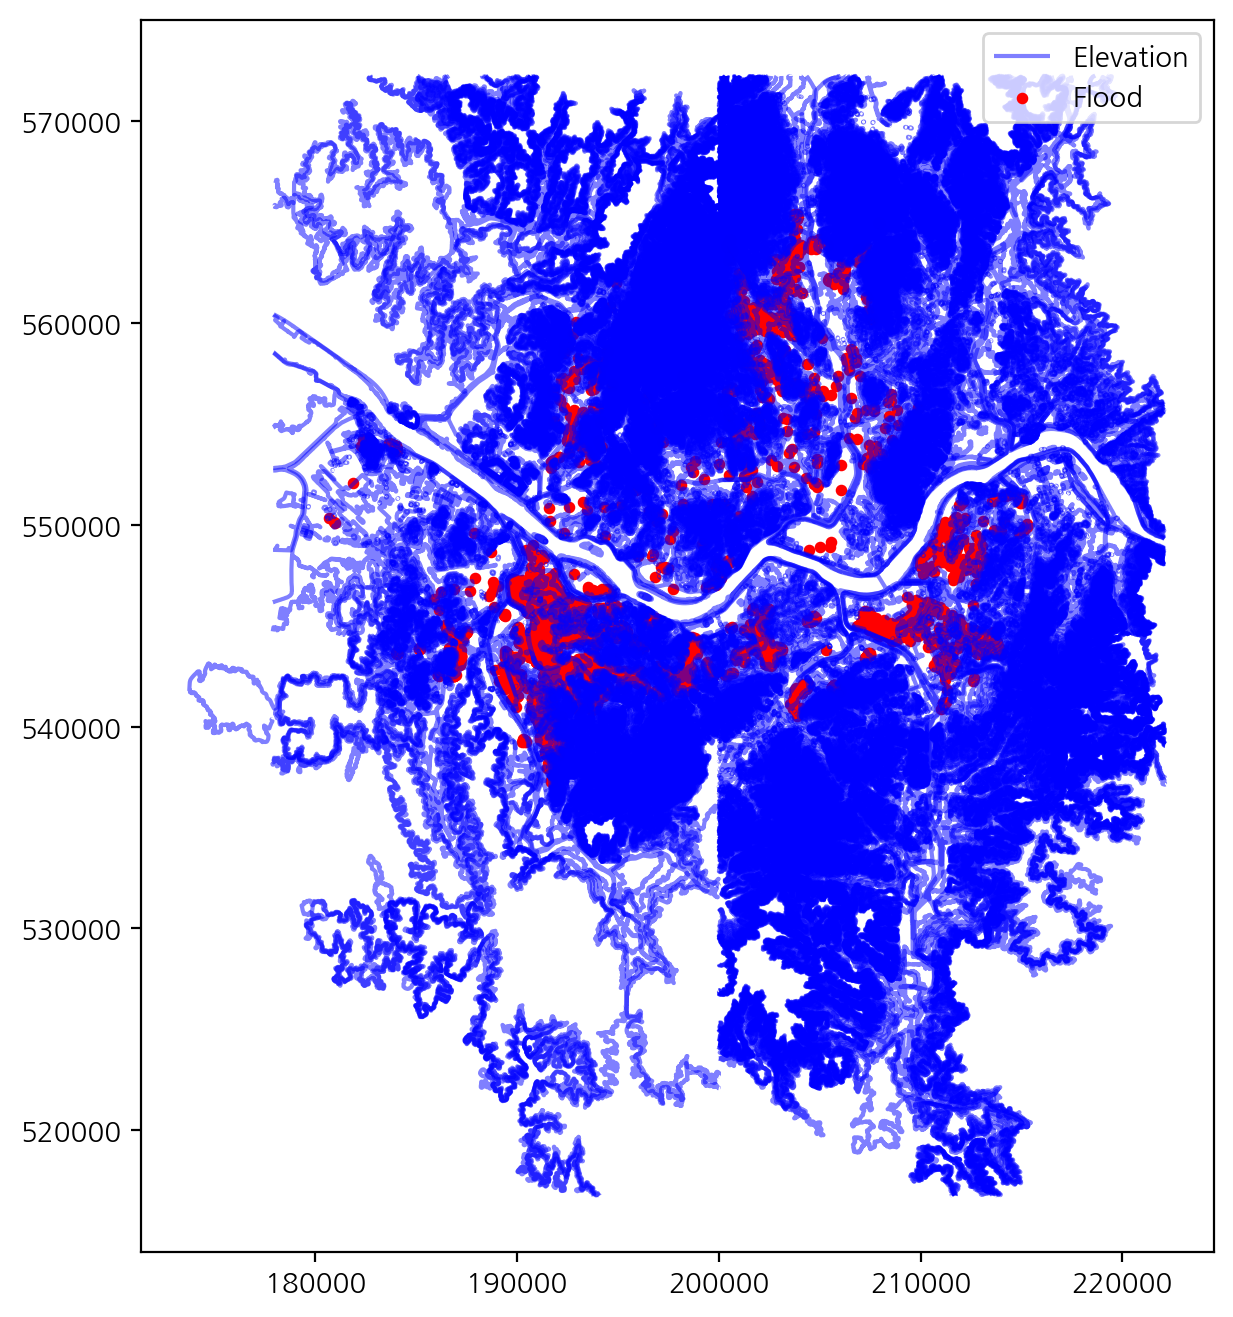

In [ ]:
import matplotlib.pyplot as plt

# 침수 데이터와 고도 데이터 시각화
fig, ax = plt.subplots(figsize=(12, 8))
df_elevation.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k', label='Elevation')
df_flood.plot(ax=ax, color='red', markersize=10, label='Flood')
plt.legend()
plt.show()
